# ISDS 7070 Group 2 Appointment No-show

 - Jeremy Bisek 
 - Michael Bond 
 - Jilliane Conley 
 - Brantley Kerns 

## Loading packages and data

In [1]:
# Import packages used to review and clean data
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
# Step 1: Load the dataset with correct data types (PatientID & AppointmentID loaded as string because they are identifiers and provide no numeric value)
df_appts_csv = pd.read_csv("appointment_no_shows.csv", dtype={"PatientId": str, "AppointmentID": str})

# Preview the first 5 rows of the data
df_appts_csv.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.98725E+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.58998E+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.26296E+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.67951E+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.84119E+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Step 2: Check out the structure of the data and the data types
df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


 - Confirmation there is no missing data

## ScheduledDay, AppointmentDay, and Days Between

In [4]:
# Step 3: Convert date columns to datetime format so we can calculate time differences and use them in analysis
df_appts_csv['ScheduledDay'] = pd.to_datetime(df_appts_csv['ScheduledDay'] , format="%Y-%m-%dT%H:%M:%SZ")
df_appts_csv['AppointmentDay'] = pd.to_datetime(df_appts_csv['AppointmentDay'] , format="%Y-%m-%dT%H:%M:%SZ")

# Confirm data types for ScheduleDay & AppointmentDay were correctly converted to datetime
print(df_appts_csv.dtypes[['ScheduledDay', 'AppointmentDay']])

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object


In [5]:
# Step 4.1: Create a column with the number of days between ScheduledDay and AppointmentDay
df_appts_csv.loc[:, 'Days_Between_Scheduled_And_Appointment'] = (
    df_appts_csv['AppointmentDay'].dt.date - df_appts_csv['ScheduledDay'].dt.date
).apply(lambda x: x.days)

In [6]:
# Step 4.2: Display rows where the days between is negative (possible data errors)
df_appts_csv.loc[df_appts_csv['Days_Between_Scheduled_And_Appointment'] < 0, 
                 ['ScheduledDay', 'AppointmentDay', 'Days_Between_Scheduled_And_Appointment']]

,ScheduledDay,AppointmentDay,Days_Between_Scheduled_And_Appointment
27033,2016-05-10 10:51:53,2016-05-09,-1
55226,2016-05-18 14:50:41,2016-05-17,-1
64175,2016-05-05 13:43:58,2016-05-04,-1
71533,2016-05-11 13:49:20,2016-05-05,-6
72362,2016-05-04 06:50:57,2016-05-03,-1


In [7]:
# Step 4.3: Remove rows where the days between is negative
df_appts_csv = df_appts_csv[df_appts_csv['Days_Between_Scheduled_And_Appointment'] >= 0]

In [8]:
# Step 4.4: Confirm negative days have been removed
df_appts_csv[df_appts_csv['Days_Between_Scheduled_And_Appointment'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days_Between_Scheduled_And_Appointment


In [9]:
# Step 4.5: Investigating No-show rate of days out
df_appts_csv['No-show_numeric'] = df_appts_csv['No-show'].map({'Yes': 1, 'No': 0})

DaysLeadNS = df_appts_csv.groupby("Days_Between_Scheduled_And_Appointment").agg(
       Total_Appointments=('No-show', 'count'),  # Count total rows
       Total_NoShows=('No-show_numeric', 'sum')  # sum no-show
)

DaysLeadNS["No-show_Rate"] = DaysLeadNS["Total_NoShows"] / DaysLeadNS["Total_Appointments"] * 100

DaysLeadNS

,Total_Appointments,Total_NoShows,No-show_Rate
Days_Between_Scheduled_And_Appointment,,,
0,38563,1792,4.646941
1,5213,1113,21.350470
2,6725,1602,23.821561
3,2737,644,23.529412
4,5290,1231,23.270321
...,...,...,...
155,10,6,60.000000
162,11,2,18.181818
169,8,1,12.500000


 - Our assumption is correct that there are differences in No-show rate based on the number of days between the scheduled and actual appointment date. 

In [10]:
# Step 5: Looking at the Gender column, the values 'M' and 'F' are stored as objects, 
# which won't help us in analysis. So let's create a new column called "GenderIsMale_Binary".
# We'll assign a value of 1 for males and 0 for females.
# We'll also convert this new column to type 'category' since it's a binary variable.
df_appts_csv['GenderIsMale_Binary'] = df_appts_csv['Gender'].map({'M': 1, 'F': 0}).astype('category')

# Confirm the column was correctly added (preserving the original column)
df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110522 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientId                               110522 non-null  object        
 1   AppointmentID                           110522 non-null  object        
 2   Gender                                  110522 non-null  object        
 3   ScheduledDay                            110522 non-null  datetime64[ns]
 4   AppointmentDay                          110522 non-null  datetime64[ns]
 5   Age                                     110522 non-null  int64         
 6   Neighbourhood                           110522 non-null  object        
 7   Scholarship                             110522 non-null  int64         
 8   Hipertension                            110522 non-null  int64         
 9   Diabetes                                11

In [11]:
# Step 6: Create new GenderIsMale_Bool field
df_appts_csv["GenderIsMale_Bool"] = df_appts_csv["Gender"] == "M"

# Confirm the column was correctly added (preserving the original column)
df_appts_csv[["Gender","GenderIsMale_Bool"]].head()

,Gender,GenderIsMale_Bool
0,F,False
1,M,True
2,F,False
3,F,False
4,F,False


NOTE: Both Step 5 and Step 6 above add a new column based on the Gender field, but they serve slightly different purposes.

Step 5 ("GenderIsMale_Binary") creates a numeric categorical column (1 for Male, 0 for Female), which is more suitable for machine learning models that require numeric input.

Step 6 ("GenderIs_BoolMale") creates a Boolean column (True/False), which is highly readable and useful for quick filtering, grouping, or exploratory analysis.

Keeping both can be helpful during the exploration phase, and the 'GenderIsMale_Binary' column can be prioritized during modng.ng.

In [12]:
# Step 7: Viewing the head (from step 1), it is suspected that the only values in the Scholarship column are 0 and 1. 
# To confirm this, display unique values in the Scholarship column
df_appts_csv["Scholarship"].value_counts(dropna=False)

Scholarship
0    99661
1    10861
Name: count, dtype: int64

In [13]:
# Step 8: Step 7 confirms that the Scholarship column is binary, but yet the data type is int.  
# Convert Scholarship data type to `category'
df_appts_csv["Scholarship"] = df_appts_csv["Scholarship"].astype("category")

# Confirm Scholarship data type was convereted
df_appts_csv["Scholarship"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [14]:
# Step 9: Viewing the head (from step 1), it is suspected that the only values in the Hipertension column are 0 and 1. 
# To confirm this, display unique values in the Hipertension column.
df_appts_csv["Hipertension"].value_counts(dropna=False)

Hipertension
0    88721
1    21801
Name: count, dtype: int64

In [15]:
# Step 10: Step 9 confirms that the Hipertension column is binary, but yet the data type is int.  
# Convert Hipertension data type to `category'
df_appts_csv["Hipertension"] = df_appts_csv["Hipertension"].astype("category")

In [16]:
# Step 11: Viewing the head (from step 1), it is suspected that the only values in the Diabetes column are 0 and 1. 
# To confirm this, display unique values in the Diabetes column
df_appts_csv["Diabetes"].value_counts(dropna=False)

Diabetes
0    102579
1      7943
Name: count, dtype: int64

In [17]:
# Step 12: Step 11 confirms that the Diabetes column is binary, but yet the data type is int.  
# Convert Diabetes data type to `category'
df_appts_csv["Diabetes"] = df_appts_csv["Diabetes"].astype("category")

In [18]:
# Step 13: Viewing the head (from step 1), the only value that appears is 0.  This requires further investigation to 
# identify all the unique values in the Alcoholism column. 
# Display unique values in the Alcoholism column
df_appts_csv["Alcoholism"].value_counts(dropna=False)

Alcoholism
0    107162
1      3360
Name: count, dtype: int64

In [19]:
# Step 14: Step 13 confirms that the Alcoholism column is binary, but yet the data type is int.
# Convert Alcoholism data type to `category'
df_appts_csv["Alcoholism"] = df_appts_csv["Alcoholism"].astype("category")

In [20]:
# Step 15: Viewing the head (from step 1), it is suspected the only values in the SMS_received column are 0 and 1. 
# To confirm this, display unique values in the SMS_received column
df_appts_csv["SMS_received"].value_counts(dropna=False)

SMS_received
0    75040
1    35482
Name: count, dtype: int64

In [21]:
# Step 16: Step 15 confirms that the SMS_received column is binary, but yet the data type is int.
# Convert SMS_received data type to `category'
df_appts_csv["SMS_received"] = df_appts_csv["SMS_received"].astype("category")

In [22]:
# Confirmation that all data types were correctly converted
df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110522 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientId                               110522 non-null  object        
 1   AppointmentID                           110522 non-null  object        
 2   Gender                                  110522 non-null  object        
 3   ScheduledDay                            110522 non-null  datetime64[ns]
 4   AppointmentDay                          110522 non-null  datetime64[ns]
 5   Age                                     110522 non-null  int64         
 6   Neighbourhood                           110522 non-null  object        
 7   Scholarship                             110522 non-null  category      
 8   Hipertension                            110522 non-null  category      
 9   Diabetes                                11

NOTE: Steps 7 - 16 converted each column's (Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received) data type to 'category'.
This step-by-step method confirmed each column truly only contains values of 0 and 1.
 Binary integers (0,1) are universally accepte by machine learning models.

In [23]:
# Step 17: Viewing the head (from step 1), the only value that appears is 0.  This requires further investigation to 
# identify all the unique values in the Handcap column. 
# Display unique values in the Handcap column
df_appts_csv["Handcap"].value_counts(dropna=False)

Handcap
0    108283
1      2040
2       183
3        13
4         3
Name: count, dtype: int64

In [24]:
# Step 18: Step 17 reveals that 98% of the records have a value of 0 (implying 0 = no handicap).
# This extremely high proportion suggests it’s more logical to create a new binary column:
# (0 = No handicap, 1 = Handicap for any value greater than 0).
# This approach is preferable to treating 'Handcap' as ordinal or creating dummy variables,
# as it avoids the risk of overfitting on categories with very few records (e.g., 1, 2, 3, 4). 

# Create a new binary column for Handcap: 0 = No handicap, 1 = Handicap (for any value > 0).  Ensure the data type is `category`
df_appts_csv["HasHandicap"] = df_appts_csv["Handcap"].apply(lambda x: 1 if x > 0 else 0).astype("category")

# Confirm new column
df_appts_csv["HasHandicap"].value_counts()

HasHandicap
0    108283
1      2239
Name: count, dtype: int64

In [25]:
# Step 19: Viewing the head (from step 1), it is suspected the only values in the No-show column are Yes and No. 
# To confirm this, display unique values in the No-show column
df_appts_csv["No-show"].value_counts(dropna=False)

No-show
No     88208
Yes    22314
Name: count, dtype: int64

In [26]:
# Step 20: Create a new No-show column to convert 'No' and 'Yes' from the No-show column to 0 and 1, ensuring data type `category`
# (preserving original No-show column of Yes/No)
df_appts_csv["No-show_binary"] = df_appts_csv["No-show"].map({"No": 0, "Yes": 1}).astype("category")

# Confirm the mapping worked
df_appts_csv["No-show_binary"].value_counts(dropna=False)

No-show_binary
0    88208
1    22314
Name: count, dtype: int64

In [27]:
# Step 21: Rename some columns to correct spelling and capitalization when appropriate in expectation of the american-english language.
df_appts_csv.rename(columns={"PatientId": "PatientID", "Neighbourhood": "Neighborhood", "Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)

# Verify column name were updated.
df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110522 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientID                               110522 non-null  object        
 1   AppointmentID                           110522 non-null  object        
 2   Gender                                  110522 non-null  object        
 3   ScheduledDay                            110522 non-null  datetime64[ns]
 4   AppointmentDay                          110522 non-null  datetime64[ns]
 5   Age                                     110522 non-null  int64         
 6   Neighborhood                            110522 non-null  object        
 7   Scholarship                             110522 non-null  category      
 8   Hypertension                            110522 non-null  category      
 9   Diabetes                                11

## Review of Age Column

In [28]:
# Step 22: Viewing the head (from step 1), it is suspected the Age column contains continuous numeric values.

# To confirm this, display the minimum and maximum values to check the full age range for any unusual values.
df_appts_csv["Age"].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [29]:
# Step 23: Show the rows that have an invalid age of a negative number (-1)
df_appts_csv[df_appts_csv["Age"] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between_Scheduled_And_Appointment,No-show_numeric,GenderIsMale_Binary,GenderIsMale_Bool,HasHandicap,No-show_binary
99832,4.65943E+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0,0,0,False,0,0


In [30]:
# Step 24.1: Keep only rows in dataset that have a positive number for age
df_appts_csv = df_appts_csv[df_appts_csv["Age"] >= 0]

In [31]:
# Step 24.2: Confirm there are no more rows with Age < 0
df_appts_csv[df_appts_csv["Age"] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Days_Between_Scheduled_And_Appointment,No-show_numeric,GenderIsMale_Binary,GenderIsMale_Bool,HasHandicap,No-show_binary


In [32]:
# Step 25: Convert Age to Int data type
df_appts_csv["Age"].astype(int)

df_appts_csv["Age"].info()

<class 'pandas.core.series.Series'>
Index: 110521 entries, 0 to 110526
Series name: Age
Non-Null Count   Dtype
--------------   -----
110521 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB


### Age Binning

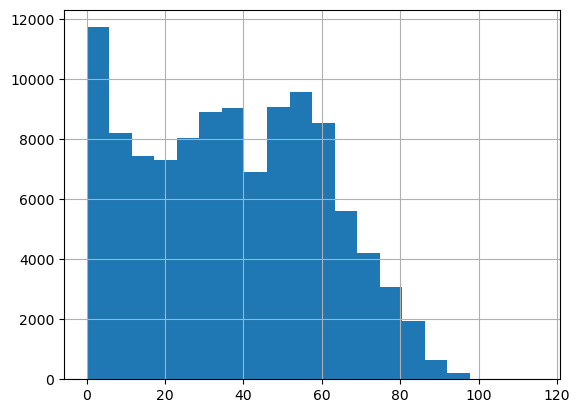

In [33]:
# Step 26:  Bin Age column to test assumptions about the effect of age on no-show rate
AgeCol = df_appts_csv["Age"]

# Plot age in histogram
AgeCol.hist(bins = 20)
plt.show()

In [34]:
# Step 27: Define the function that will bin age groups
def age_binning(age):
    if age < 16:
        return '0 - 15'
    elif age >= 65:
        return '65 +'
    elif age <= 24:
        return "16 - 24"
    elif age <= 34:
        return "25 - 34"
    elif age <= 44:
        return "35 - 44"
    elif age <= 54:
        return "45 - 54"
    elif age <= 64:
        return "55 - 64"

# Apply the function to create or update the AgeBin column
df_appts_csv["AgeBin"] = df_appts_csv["Age"].apply(age_binning)

df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientID                               110521 non-null  object        
 1   AppointmentID                           110521 non-null  object        
 2   Gender                                  110521 non-null  object        
 3   ScheduledDay                            110521 non-null  datetime64[ns]
 4   AppointmentDay                          110521 non-null  datetime64[ns]
 5   Age                                     110521 non-null  int64         
 6   Neighborhood                            110521 non-null  object        
 7   Scholarship                             110521 non-null  category      
 8   Hypertension                            110521 non-null  category      
 9   Diabetes                                11

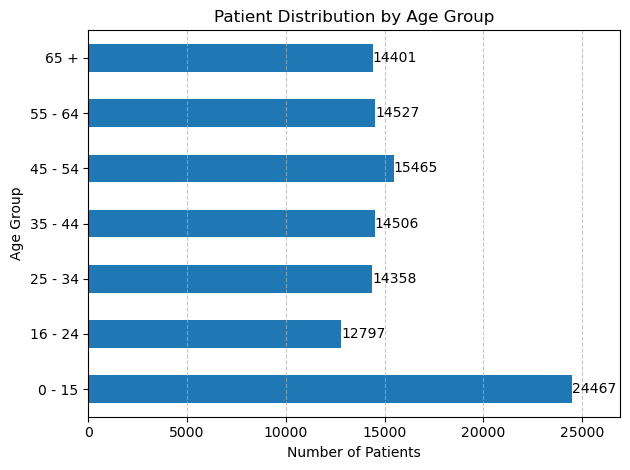

In [35]:
# Step 28: # Plot AgeBin sorted by minimum age in each category to show distribution of Age groups
age_counts = df_appts_csv["AgeBin"].value_counts()

# Custom sorting function to handle both "X-Y" format and "X +" format
def extract_min_age(age_bin):
    if '-' in age_bin:
        return int(age_bin.split('-')[0])
    elif '+' in age_bin or ' +' in age_bin:
        return int(age_bin.split('+')[0].strip())
    else:
        # Handle any other formats if needed
        return 0

# Sort using the custom function
sorted_age_counts = age_counts.sort_index(key=lambda x: x.map(extract_min_age))

# Plot the sorted data with labels and title
ax = sorted_age_counts.plot(kind='barh')
ax.set_xlabel('Number of Patients')
ax.set_ylabel('Age Group')
ax.set_title('Patient Distribution by Age Group')

# Add value labels at the end of each bar
for i, v in enumerate(sorted_age_counts):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust x-axis limit to make room for the annotations
x_max = max(sorted_age_counts) * 1.1  # Add 10% extra space
ax.set_xlim(0, x_max)

# Optionally add grid lines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Day of the Week
 - Testing assumption that Tuesdays would have a lower no-show and that Friday would have a higher no-show

In [36]:
# Step 29: Create a new column showing the day of the week for each appointment
df_appts_csv["DayofWeek"] = df_appts_csv["AppointmentDay"].dt.day_name()

In [37]:
# Step 30: Group by DayofWeek and list total appointments per day
df_appts_csv["DayofWeek"].value_counts()

DayofWeek
Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: count, dtype: int64

           Total_Appointments  Total_NoShows  NoShow_Percentage
DayofWeek                                                      
Saturday                   39              9              23.08
Friday                  19019           4037              21.23
Monday                  22713           4689              20.64
Tuesday                 25638           5150              20.09
Wednesday               25866           5092              19.69
Thursday                17246           3337              19.35


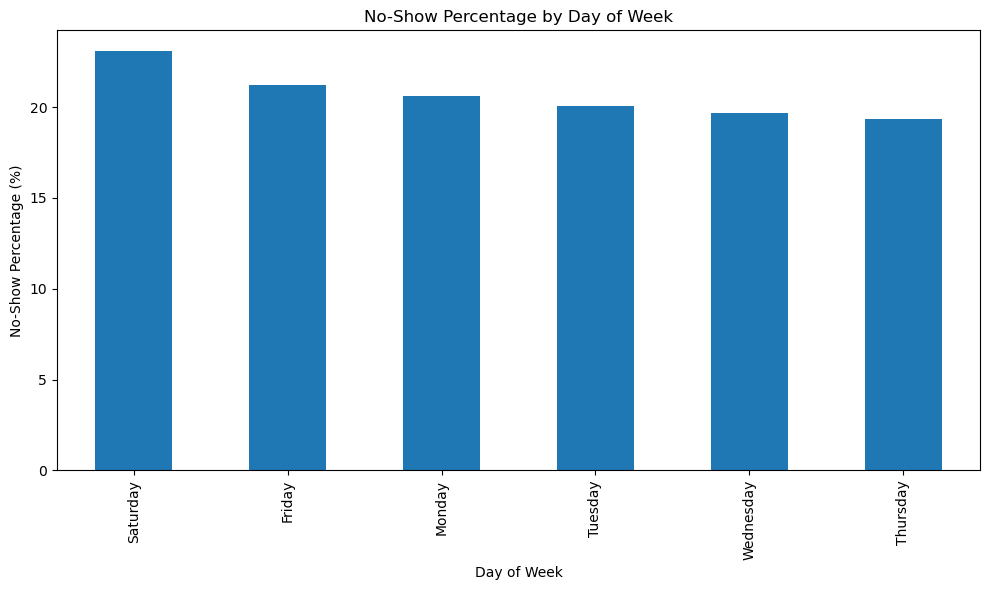

In [38]:
# Step 31: Show the total No-shows by Day of the Week
# First, ensure No-show is in binary format (1 for no-show, 0 for show)
# If it's not already binary, convert it (assuming 'Yes'/'No' or similar values)
if df_appts_csv['No-show'].dtype == 'object':
    df_appts_csv['No-show_binary'] = df_appts_csv['No-show'].map({'Yes': 1, 'No': 0})
else:
    # If it's already numeric, just make a copy or use as is
    df_appts_csv['No-show_binary'] = df_appts_csv['No-show']

# Group by DayofWeek and calculate no-show percentage
day_noshow_rates = df_appts_csv.groupby('DayofWeek').agg(
    Total_Appointments=('No-show_binary', 'count'),  # Count total appointments per day
    Total_NoShows=('No-show_binary', 'sum')          # Sum no-shows per day
)

# Calculate the no-show percentage
day_noshow_rates['NoShow_Percentage'] = (day_noshow_rates['Total_NoShows'] / 
                                        day_noshow_rates['Total_Appointments'] * 100)

# Round to 2 decimal places for better readability
day_noshow_rates['NoShow_Percentage'] = day_noshow_rates['NoShow_Percentage'].round(2)

# Display the results ordered by the greatest no-show to least
print(day_noshow_rates.sort_values(by = "NoShow_Percentage", ascending=False))

# visualize this data
day_noshow_rates['NoShow_Percentage'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('No-Show Percentage by Day of Week')
plt.ylabel('No-Show Percentage (%)')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

 - Here, our assumption is correct that Fridays have the highest no-show rate among all weekdays. Though we did not account weekend appointments in our assumptions. 

## Total identified health variables affecting a patient

In [39]:
# Step 32: Calculate total affected health variables row by row (non-static)
HealthVar_cols = ["Hypertension", "Diabetes", "Alcoholism", "Handicap"]

df_appts_csv["Total_HealthVars"] = df_appts_csv[HealthVar_cols].sum(axis=1)

In [40]:
# Step 32.2: Verify results
df_appts_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientID                               110521 non-null  object        
 1   AppointmentID                           110521 non-null  object        
 2   Gender                                  110521 non-null  object        
 3   ScheduledDay                            110521 non-null  datetime64[ns]
 4   AppointmentDay                          110521 non-null  datetime64[ns]
 5   Age                                     110521 non-null  int64         
 6   Neighborhood                            110521 non-null  object        
 7   Scholarship                             110521 non-null  category      
 8   Hypertension                            110521 non-null  category      
 9   Diabetes                                11

In [41]:
# Step 32.3: Test No-show rate among Total_HealthVars
HealthVarGroup = df_appts_csv.groupby("Total_HealthVars").agg(
       Total_Appointments=('PatientID', 'count'),  # Count total rows 
       Total_NoShows=('No-show_numeric', 'sum')  # Sum total no-shows
)

HealthVarGroup["No-show_Rate"] = HealthVarGroup["Total_NoShows"] / HealthVarGroup["Total_Appointments"] * 100


print(HealthVarGroup)

                  Total_Appointments  Total_NoShows  No-show_Rate
Total_HealthVars                                                 
0                              84111          17600     20.924730
1                              18012           3231     17.938041
2                               7710           1364     17.691310
3                                624            106     16.987179
4                                 63             12     19.047619
5                                  1              1    100.000000


 - We identified that there is generally a higher no-show rate for patients with zero total health variables
 - However, we only see a significant difference in no-show rates for patients that have two or more total health variables

## Bin Neighborhood

Neighborhood (renamed from Neighbourhood)

 - A known predictor of no-show rate is the distance a patient must travel to see the doctor.
While we do not have any geographical information to create any approximation of distance, we do have the known neighborhoods of each patient.
Each neighborhood will inherit characteristics about a location that also influence a patient's No-show rate such as access to transportation and distance to the clinic.

 - Lets explore the data to validate assumptions that location influences no-show rates:

Unique Values: 81


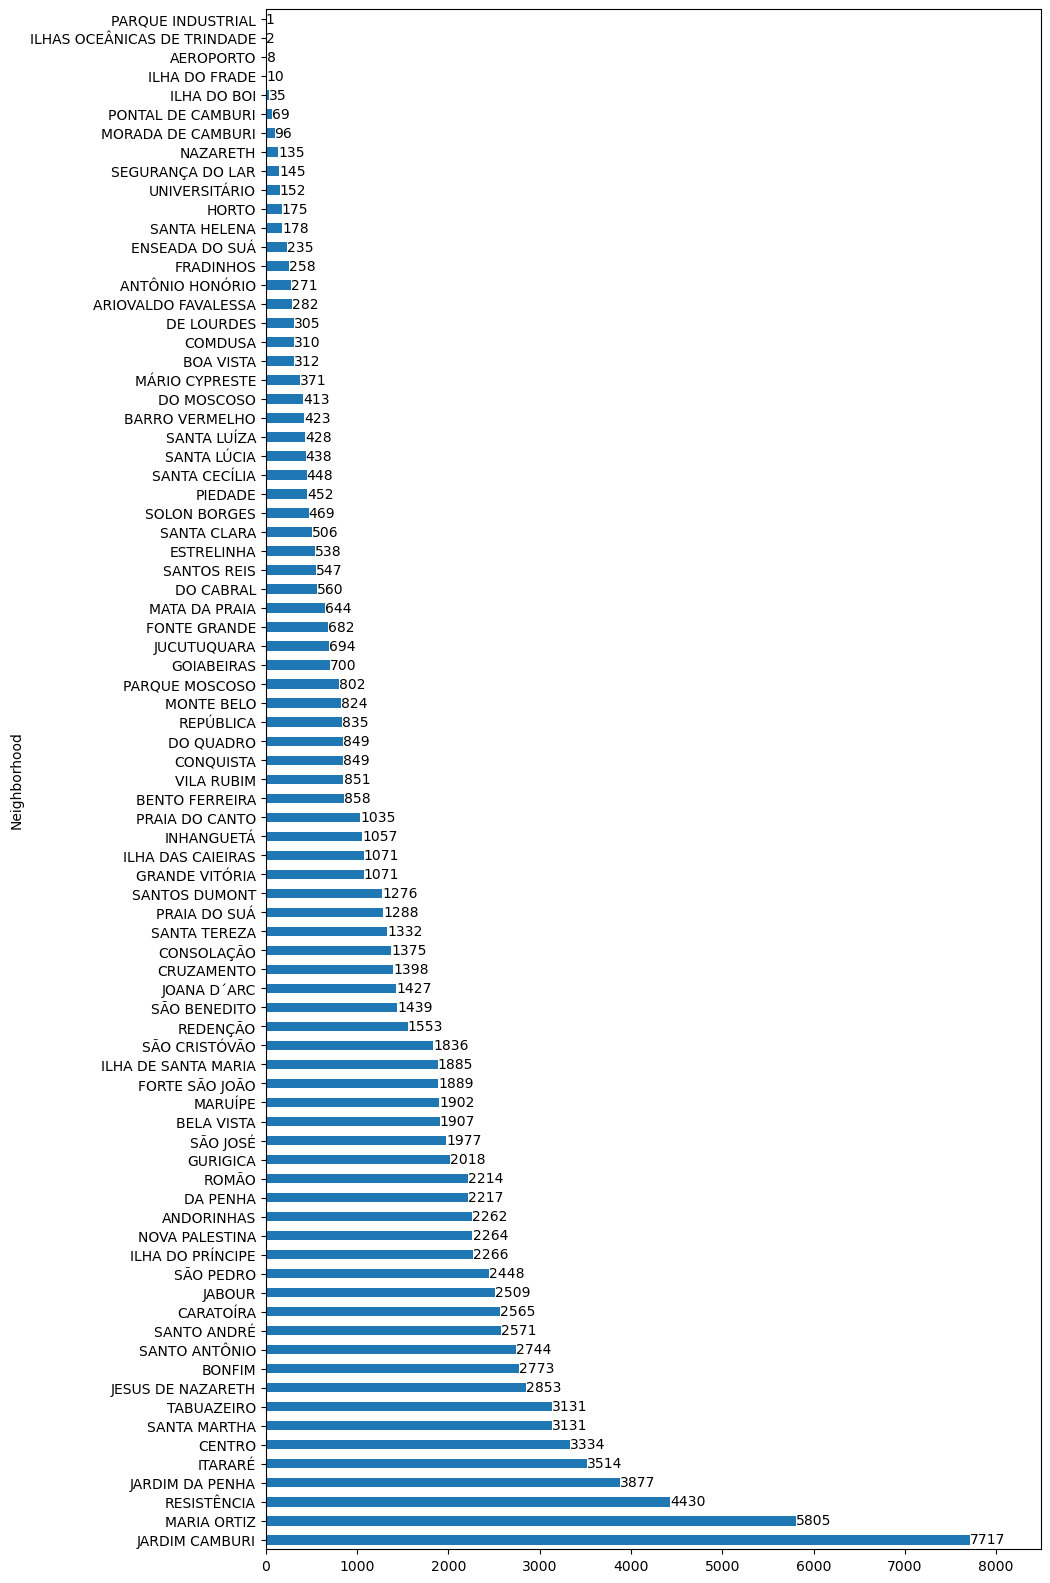

In [42]:
# Step 33: Return count of unique values in Neighborhood (renamed from neighbourhood)
Nbhood = df_appts_csv["Neighborhood"]
print("Unique Values: " + str(len(Nbhood.unique())))

# Plot unique values on a graph
Nbhood_values = df_appts_csv["Neighborhood"].value_counts().sort_values(ascending=False)

# Create the plot and store the axes object
fig, ax = plt.subplots(figsize=(10, 20))
Nbhood_values.plot(kind="barh", figsize=(10, 20), ax=ax)

# Add value labels at the end of each bar
for i, v in enumerate(Nbhood_values):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust x-axis limit to make room for the annotations
# Use the maximum value in Nbhood_values plus some padding
ax.set_xlim(0, Nbhood_values.max() * 1.1)  # Add 10% padding
plt.show()

- There are 5 locations that have 35 or less observed patients from that location.
 - - ILHA DO BOI [35]
   - AEROPORTO [10]
   - ILHAS OCEANICAS DE TRINDADE [2]
   - PARQUE INDUSTRIAL [1]
 - Because No-show rate is a calculated percentage of the total appointments, any no-shows in one of these 5 locations will have a far larger effect on the total No-show rate of that location.
 - To avoid this problem, the 5 locations with a value of 35 or less will be grouped into one location called "Other" to avoid an over-generalization of no-show rates to any single location.

In [43]:
# Step 34: Group the five locations into "Other Neighborhood" Category
df_appts_csv["Neighborhood"] = df_appts_csv["Neighborhood"].replace(['ILHA DO BOI','ILHA DO FRADE','AEROPORTO','ILHAS OCEÂNICAS DE TRINDADE','PARQUE INDUSTRIAL'], 'OTHER NEIGHBORHOOD')

Unique Values: 77


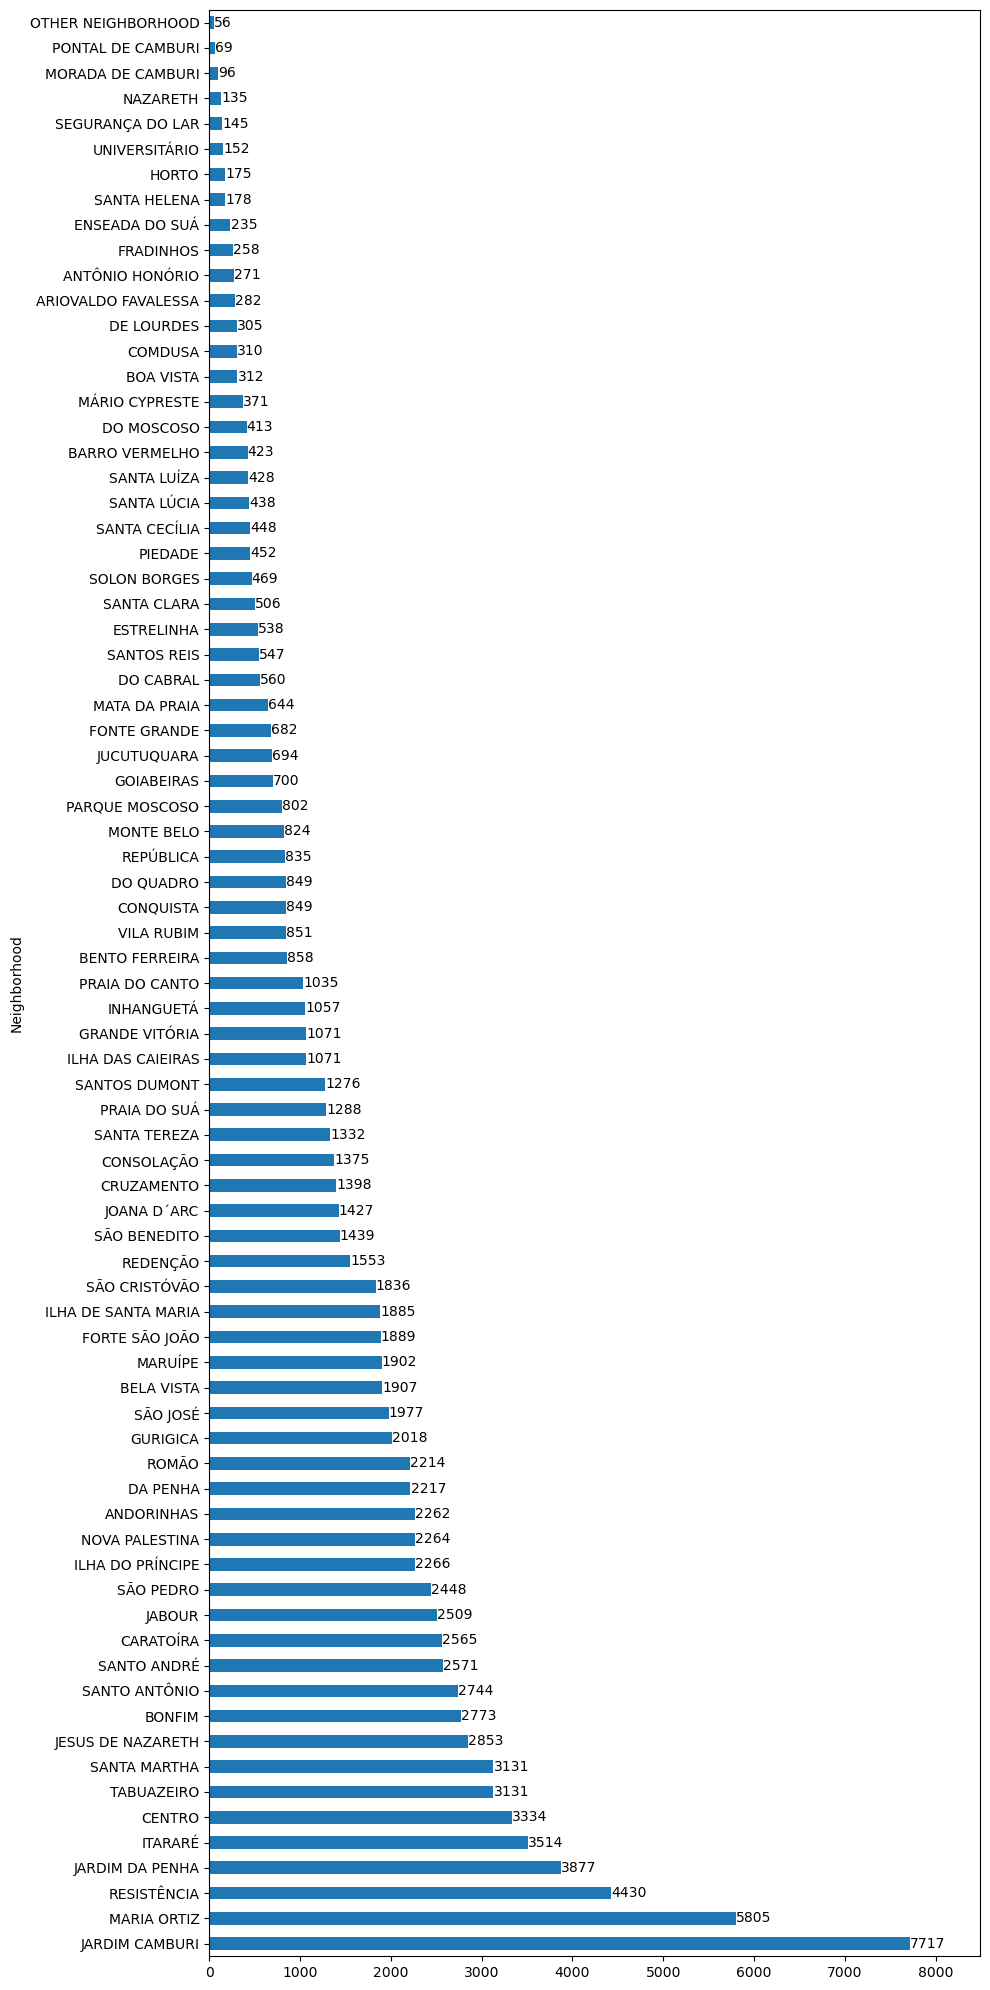

In [44]:
# Step 35: Plot the values back on the graph to see if they were grouped properly
# Return count of unique values in Neighborhood
Nbhood = df_appts_csv["Neighborhood"]
print("Unique Values: " + str(len(Nbhood.unique())))

# Plot unique values on a graph
Nbhood_values = df_appts_csv["Neighborhood"].value_counts().sort_values(ascending=False)

# Create the plot and store the axes object
fig, ax = plt.subplots(figsize=(10, 20))
Nbhood_values.plot(kind="barh", figsize=(10, 20), ax=ax)

# Add value labels at the end of each bar
for i, v in enumerate(Nbhood_values):
    ax.text(v + 0.5, i, str(v), va='center')

# Adjust x-axis limit to make room for the annotations
# Use the maximum value in Nbhood_values plus some padding
ax.set_xlim(0, Nbhood_values.max() * 1.1)  # Add 10% padding

plt.tight_layout()
plt.show()

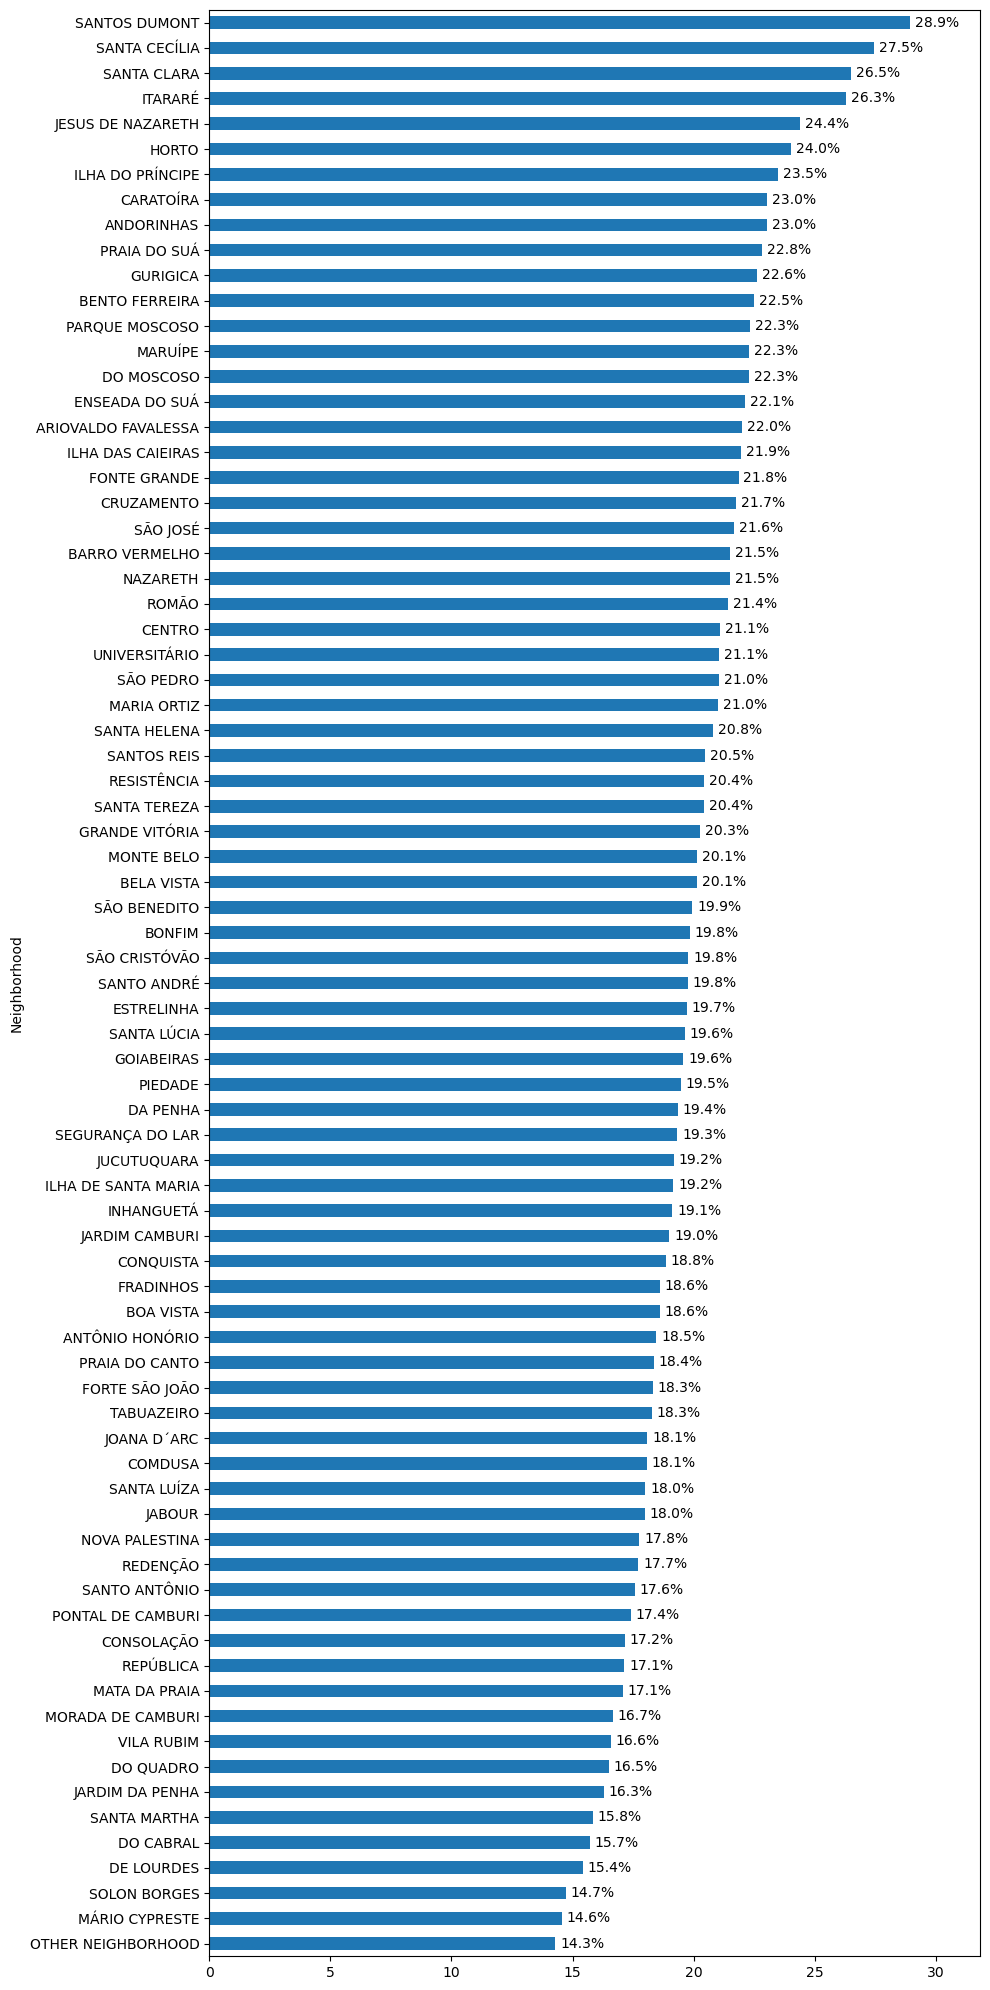

In [45]:
# Step 36: Create pivot table of Total Appointments/Rows and Total No-Shows
Nbhood_nshow = df_appts_csv.groupby('Neighborhood').agg(
    Total_Appointments=('No-show', 'count'),  # Count total rows per neighborhood
    Total_NoShows=('No-show', 'count')        # Count No-show values per neighborhood
)

# Convert the No-show column to numeric before calculating the rate
# Assuming 'No-show' contains 'Yes'/'No' or similar string values
df_appts_csv['No-show_numeric'] = df_appts_csv['No-show'].map({'Yes': 1, 'No': 0})

# Recalculate the Total_NoShows with numeric values
Nbhood_nshow = df_appts_csv.groupby('Neighborhood').agg(
    Total_Appointments=('No-show', 'count'),           # Count total rows per neighborhood
    Total_NoShows=('No-show_numeric', 'sum')           # Sum numeric No-show values
)

Nbhood_nshow["NoShow_Rate"] = Nbhood_nshow["Total_NoShows"] / Nbhood_nshow["Total_Appointments"] * 100

# Sort the data and create the plot, capturing the axes object
sorted_data = Nbhood_nshow["NoShow_Rate"].sort_values()
nsax = sorted_data.plot(kind="barh", figsize=(10, 20))

# Add value labels at the end of each bar
for i, v in enumerate(sorted_data):
    # Format the value to show one decimal place
    nsax.text(v + 0.2, i, f"{v:.1f}%", va='center')

# Adjust x-axis limit to make room for the annotations
nsax.set_xlim(0, Nbhood_nshow["NoShow_Rate"].max() * 1.1)  # Add 10% padding

plt.tight_layout()
plt.show()

 - There is a distinct difference in No-show rate among neighborhoods and may be an influenctial factor in predicting no-shows of patient appointments.

## Patient's Cumulative total No-Shows as of each appointment date
 - This is to test the assumption that a patient with more historical no-shows will be more likely to no-show again.

In [46]:
# Step 36: Sort by PatientID and AppointmentDay
df_appts_csv = df_appts_csv.sort_values(by=["PatientID", "AppointmentDay"])

In [47]:
# Step 37: List top 10 patients by appointment count to look for patient examples
df_appts_csv["PatientID"].value_counts().head(10)

PatientID
8.22146E+14    88
99637671331    84
2.68861E+13    70
3.35348E+13    65
2.58424E+11    62
7.57975E+13    62
8.71375E+14    62
6.2642E+12     62
6.68449E+13    57
8.72279E+11    55
Name: count, dtype: int64

In [48]:
# Step 38: Backward look of total No-show appointments for that patient before the appointment date row
df_appts_csv["Cumulative No-Shows"] = (
    df_appts_csv
        .groupby("PatientID")["No-show"]
        .transform(lambda x: (x.shift() == "Yes").cumsum())
)

# Looking at an example of a specific patient.
df_pats = df_appts_csv[df_appts_csv["PatientID"] == "99637671331"] 

df_pats.tail(10)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,...,Days_Between_Scheduled_And_Appointment,No-show_numeric,GenderIsMale_Binary,GenderIsMale_Bool,HasHandicap,No-show_binary,AgeBin,DayofWeek,Total_HealthVars,Cumulative No-Shows
100372,99637671331,5776979,M,2016-06-06 12:30:55,2016-06-06,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Monday,0,2
108710,99637671331,5775220,M,2016-06-06 09:11:08,2016-06-06,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Monday,0,2
98842,99637671331,5784267,M,2016-06-07 15:30:18,2016-06-07,46,JABOUR,0,0,0,...,0,1,1,True,0,1,45 - 54,Tuesday,0,2
109199,99637671331,5717867,M,2016-05-19 08:31:21,2016-06-07,46,JABOUR,0,0,0,...,19,1,1,True,0,1,45 - 54,Tuesday,0,3
98833,99637671331,5789402,M,2016-06-08 14:57:02,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4
108671,99637671331,5786534,M,2016-06-08 08:33:17,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4
108759,99637671331,5789410,M,2016-06-08 14:57:48,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4
108807,99637671331,5788280,M,2016-06-08 11:44:48,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4
108816,99637671331,5788263,M,2016-06-08 11:42:32,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4
109131,99637671331,5790214,M,2016-06-08 17:16:39,2016-06-08,46,JABOUR,0,0,0,...,0,0,1,True,0,0,45 - 54,Wednesday,0,4


 - Confirmation that we are correctly capturing the cumulative number of No-shows for that patient as of that appointment date

In [49]:
df_appts_csv.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Days_Between_Scheduled_And_Appointment', 'No-show_numeric',
       'GenderIsMale_Binary', 'GenderIsMale_Bool', 'HasHandicap',
       'No-show_binary', 'AgeBin', 'DayofWeek', 'Total_HealthVars',
       'Cumulative No-Shows'],
      dtype='object')

## SMS_Received
 - Testing assumption that patients who receive an SMS text message will be less likely to No-show

In [50]:
# Step 39: Testing the Correlation Coefficient between SMS_Received and No-Show
correlation = df_appts_csv['SMS_received'].corr(df_appts_csv['No-show_binary'])

print(correlation)

0.12650244787849368


 - Reviewing the correlation coefficient between SMS_received and No-Show indicates a weak correlation between the two variables. This is counter to our assumption that receiving a reminder notification would lower no-show rates.

## Test Age_Bins and no-show rate
 - Testing our assumptions that patients aged 25 - 45 have a higher no-show rate
   

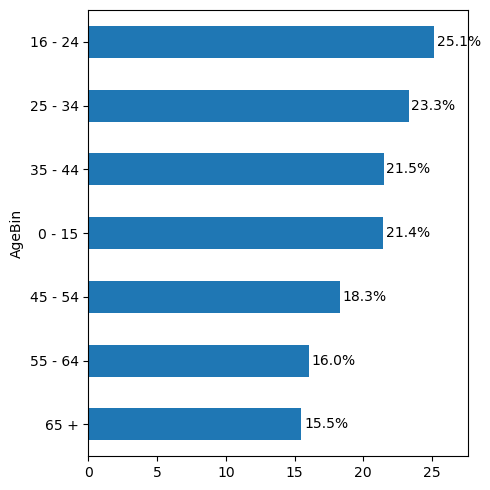

In [51]:
# Step 40: Create pivot table of Total Appointments/Rows and Total No-Shows
AgeBin_nshow = df_appts_csv.groupby('AgeBin').agg(
    Total_Appointments=('No-show', 'count'),  # Count total rows per AgeBin
    Total_NoShows=('No-show', 'count')        # Count No-show values per AgeBin
)

# Convert the No-show column to numeric before calculating the rate
# Assuming 'No-show' contains 'Yes'/'No' or similar string values
df_appts_csv['No-show_numeric'] = df_appts_csv['No-show'].map({'Yes': 1, 'No': 0})

# Recalculate the Total_NoShows with numeric values
AgeBin_nshow = df_appts_csv.groupby('AgeBin').agg(
    Total_Appointments=('No-show', 'count'),           # Count total rows per AgeBin
    Total_NoShows=('No-show_numeric', 'sum')           # Sum numeric No-show values
)

AgeBin_nshow["NoShow_Rate"] = AgeBin_nshow["Total_NoShows"] / AgeBin_nshow["Total_Appointments"] * 100

# Sort the data and create the plot, capturing the axes object
absorted_data = AgeBin_nshow["NoShow_Rate"].sort_values()
absax = absorted_data.plot(kind="barh", figsize=(5, 5))

# Add value labels at the end of each bar
for i, v in enumerate(absorted_data):
    # Format the value to show one decimal place
    absax.text(v + 0.2, i, f"{v:.1f}%", va='center')

# Adjust x-axis limit to make room for the annotations
absax.set_xlim(0, AgeBin_nshow["NoShow_Rate"].max() * 1.1)  # Add 10% padding

plt.tight_layout()
plt.show()

 - Our assumptions were correct that 25-45 had generally higher no-show rates while 65+ had generally lower no-show rates. We were incorrect in assuming that the 0-15 age range would have a lower no-show rate. 

In [52]:
# Step 40.1: Investigating which ages have scholarships
df_appts_csv["Scholarship_Int"] =  df_appts_csv["Scholarship"].astype(int)

AgeScholars = df_appts_csv.groupby("AgeBin").agg(
       Total_Appointments=('No-show', 'count'),  # Count total rows per AgeBin
    Total_Scholarships=("Scholarship_Int", 'sum'),     # Sum Total Scholarships
       Total_NoShows=('No-show_numeric', 'sum')  # Count total rows per AgeBin
)

AgeScholars["Scholars_Percent"] = AgeScholars["Total_Scholarships"] / AgeScholars["Total_Appointments"] * 100
AgeScholars["No-show_Rate"] = AgeScholars["Total_NoShows"] / AgeScholars["Total_Appointments"] * 100

AgeScholars

print(AgeScholars)

         Total_Appointments  Total_Scholarships  Total_NoShows  \
AgeBin                                                           
0 - 15                24467                2609           5247   
16 - 24               12797                1521           3216   
25 - 34               14358                2076           3345   
35 - 44               14506                2247           3115   
45 - 54               15465                1370           2832   
55 - 64               14527                 747           2327   
65 +                  14401                 291           2232   

         Scholars_Percent  No-show_Rate  
AgeBin                                   
0 - 15          10.663342     21.445212  
16 - 24         11.885598     25.130890  
25 - 34         14.458838     23.297117  
35 - 44         15.490142     21.473873  
45 - 54          8.858713     18.312318  
55 - 64          5.142149     16.018448  
65 +             2.020693     15.498924  


 - We were incorrect about our assumption that Scholarship is explained by age
 - Next, we investigate the no-show rate of age groups with a scholarship

In [53]:
# Step 40.2: Investigating No-show rate of those with scholarships
df_appts_csv["Scholarship_Int"] =  df_appts_csv["Scholarship"].astype(int)
df_appts_Scholars = df_appts_csv[df_appts_csv["Scholarship"] == 1]

AgeScholars2 = df_appts_Scholars.groupby("AgeBin").agg(
       Total_Appointments=('No-show', 'count'),  # Count total rows per AgeBin
    Total_Scholarships=("Scholarship_Int", 'sum'),     # Sum Total Scholarships
       Total_NoShows=('No-show_numeric', 'sum')  # Count total rows per AgeBin
)

AgeScholars2["Scholars_Percent"] = AgeScholars2["Total_Scholarships"] / AgeScholars2["Total_Appointments"] * 100
AgeScholars2["No-show_Rate"] = AgeScholars2["Total_NoShows"] / AgeScholars2["Total_Appointments"] * 100


print(AgeScholars2)

         Total_Appointments  Total_Scholarships  Total_NoShows  \
AgeBin                                                           
0 - 15                 2609                2609            614   
16 - 24                1521                1521            422   
25 - 34                2076                2076            527   
35 - 44                2247                2247            557   
45 - 54                1370                1370            272   
55 - 64                 747                 747            148   
65 +                    291                 291             38   

         Scholars_Percent  No-show_Rate  
AgeBin                                   
0 - 15              100.0     23.533921  
16 - 24             100.0     27.744905  
25 - 34             100.0     25.385356  
35 - 44             100.0     24.788607  
45 - 54             100.0     19.854015  
55 - 64             100.0     19.812584  
65 +                100.0     13.058419  


  - The no-show rate for those with scholarships follows the same distribution as the total no-shows for all patients across age
  - Therefore, scholarship does not influence no-show rate among age groups.

## Creating Dummy Variables and Transform Values

In [54]:
#Step 41: Create a new table for df_appts_model to keep only the columns used in the final model
df_appts_model = df_appts_csv.copy()
df_appts_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 84473 to 4234
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientID                               110521 non-null  object        
 1   AppointmentID                           110521 non-null  object        
 2   Gender                                  110521 non-null  object        
 3   ScheduledDay                            110521 non-null  datetime64[ns]
 4   AppointmentDay                          110521 non-null  datetime64[ns]
 5   Age                                     110521 non-null  int64         
 6   Neighborhood                            110521 non-null  object        
 7   Scholarship                             110521 non-null  category      
 8   Hypertension                            110521 non-null  category      
 9   Diabetes                                

In [55]:
# Create Age Bin dummy variables
age_dummies = pd.get_dummies(df_appts_model['AgeBin'], prefix='Age', drop_first=True)
df_appts_model = pd.concat([df_appts_model, age_dummies], axis=1)

In [56]:
# Create the Day of Week dummy variables
df_appts_model['DayofWeek'] = df_appts_model['AppointmentDay'].dt.day_name()
day_dummies = pd.get_dummies(df_appts_model['DayofWeek'], prefix='Day', drop_first=True)
df_appts_model = pd.concat([df_appts_model, day_dummies], axis=1)

In [57]:
# Create new column for DayOfWeek that represents the total no-show rates for that day of week. 
# We already collected the No-show rates for each day of week in step 31 into day_noshow_rates. Now we will match those into the data. 

# Normalize the Neighborhood No-show rates in Nbhood_nshow for better modeling using Min-max method
day_noshow_rates.reset_index(inplace=True)
day_noshow_rates['NoShow_Percentage'] = (
    (day_noshow_rates['NoShow_Percentage'] - day_noshow_rates['NoShow_Percentage'].min()) /
    (day_noshow_rates['NoShow_Percentage'].max() - day_noshow_rates['NoShow_Percentage'].min())
)

# Merge on DayOfWeek Noshow column
df_appts_model = df_appts_model.merge(
    day_noshow_rates[['DayofWeek', 'NoShow_Percentage']].rename(columns={'NoShow_Percentage': 'DoW_NoShow'}),
    on='DayofWeek',
    how='left'  # ensures all rows in df_appts_model are kept
)


In [58]:
# get a binary flag for if the variable is made same day or not
df_appts_model["MadeSameDay"] = df_appts_model["Days_Between_Scheduled_And_Appointment"].apply(lambda x: 1 if x == 0 else 0)
df_appts_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   PatientID                               110521 non-null  object        
 1   AppointmentID                           110521 non-null  object        
 2   Gender                                  110521 non-null  object        
 3   ScheduledDay                            110521 non-null  datetime64[ns]
 4   AppointmentDay                          110521 non-null  datetime64[ns]
 5   Age                                     110521 non-null  int64         
 6   Neighborhood                            110521 non-null  object        
 7   Scholarship                             110521 non-null  category      
 8   Hypertension                            110521 non-null  category      
 9   Diabetes                             

In [59]:
# Change 0/1 fields to binary
df_appts_model[["GenderIsMale_Binary"]] = df_appts_model[["GenderIsMale_Binary"]].astype(int)
df_appts_model[["HasHandicap"]] = df_appts_model[["HasHandicap"]].astype(int)
df_appts_model[["Scholarship"]] = df_appts_model[["Scholarship"]].astype("int64")
df_appts_model[["Hypertension"]] = df_appts_model[["Hypertension"]].astype("int64")
df_appts_model[["Diabetes"]] = df_appts_model[["Diabetes"]].astype("int64")
df_appts_model[["Alcoholism"]] = df_appts_model[["Alcoholism"]].astype("int64")
df_appts_model[["SMS_received"]] = df_appts_model[["SMS_received"]].astype("int64")

In [60]:
# Create new column for Neighborhood that represents the mean no-show for that neighborhood. 
# We already collected the No-show rates for each neighborhood in step 36 into Nbhood_nshow. Now we will match those into the data. 

# Normalize the Neighborhood No-show rates in Nbhood_nshow for better modeling using Min-max method
Nbhood_nshow.reset_index(inplace=True)
Nbhood_nshow['NoShow_Rate'] = (
    (Nbhood_nshow['NoShow_Rate'] - Nbhood_nshow['NoShow_Rate'].min()) /
    (Nbhood_nshow['NoShow_Rate'].max() - Nbhood_nshow['NoShow_Rate'].min())
)

# Merge on 'Neighborhood' column
df_appts_model = df_appts_model.merge(
    Nbhood_nshow[['Neighborhood', 'NoShow_Rate']].rename(columns={'NoShow_Rate': 'Nbhood_NoShow_Normal'}),
    on='Neighborhood',
    how='left'  # ensures all rows in df_appts_model are kept
)

#Nbhood_nshow.head()


In [61]:
# Drop Columns not used in modeling
df_appts_model.drop(["PatientID"], inplace=True, axis=1)
df_appts_model.drop(["AppointmentID"], inplace=True, axis=1)
df_appts_model.drop(["Gender"], inplace=True, axis=1)
df_appts_model.drop(["ScheduledDay"], inplace=True, axis=1)
df_appts_model.drop(["AppointmentDay"], inplace=True, axis=1)
df_appts_model.drop(["Age"], inplace=True, axis=1)
df_appts_model.drop(["Neighborhood"], inplace=True, axis=1)
df_appts_model.drop(["Handicap"], inplace=True, axis=1)
df_appts_model.drop(["No-show"], inplace=True, axis=1)
df_appts_model.drop(["No-show_numeric"], inplace=True, axis=1)
df_appts_model.drop(["GenderIsMale_Bool"], inplace=True, axis=1)
df_appts_model.drop(["AgeBin"], inplace=True, axis=1)
df_appts_model.drop(["Scholarship_Int"], inplace=True, axis=1)
df_appts_model.drop(["DayofWeek"], inplace=True, axis=1)

In [62]:
# Test the data set has only the columns we need
df_appts_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Scholarship                             110521 non-null  int64  
 1   Hypertension                            110521 non-null  int64  
 2   Diabetes                                110521 non-null  int64  
 3   Alcoholism                              110521 non-null  int64  
 4   SMS_received                            110521 non-null  int64  
 5   Days_Between_Scheduled_And_Appointment  110521 non-null  int64  
 6   GenderIsMale_Binary                     110521 non-null  int64  
 7   HasHandicap                             110521 non-null  int64  
 8   No-show_binary                          110521 non-null  int64  
 9   Total_HealthVars                        110521 non-null  int64  
 10  Cumulative No-Shows                     1105

# Modeling


In [63]:
#Import modeling packages
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#df_appts_model.columns

## How the model was tested
 - Each model used the same Training and Testing data for the best comparison of scores across models.
 - Each model was developed through an iterative process of adding, removing, or transforming variables.
 - Both the Decision Tree and Random Forest classifier models were used.
 - The "class_weight=balanced" attribute and value was passed through each model to prevent the models from predicting all values as 0 to produce a nieve model result (which returned a 79% accuracy, for comparison purposes).
 - Models were developed by removing any columns that showed a low predictive power using feature importance attributes at the end of the Random Forest model; those fields were removed by adding them into an "exclude_cols" variable.

### Reasoning for each column
 - Nbhood_NoShow_Normal, Cumulative_NoShow, and DoW_NoShow variables all had the greatest feature importance to the Random Classifier model and yet, when removed, increased the overall model accuracy by nearly 25 points. These fields exhibited behaviors of overfitting the model and thus removed from the final model.
 - Day of the Week variables all had low importance in the final model. When removed, accuracy increased due to lower dimensionality.
 - HasHandicap, Alcoholism, Diabetes, and Hypertension were all used to create the Total_HealthVars. Including all fields increased dimensionality without adding any new information.
   - Alcoholism, Diabetes, and HasHandicap were removed for low predictive power and were represented in the Total_HealthVars variable.
   - Hypertension had a greater feature importance weight than Total_HealthVars, thus Total_HealthVars was dropped from the model.
   - Each field removed increased overall model accuracy by 1-3%.
 - Days_Between_Scheduled_And_Appointment, when included, was over-utilzed for feature importance in the model which caused overall accuracy drop by nearly 25 points.
 - The MadeSameDay field was created to reduce overall dimensionality from the Days_Between_Scheduled_And_Appointment to create a binary field that indicated if the appointment was made the same day as the actual appointment. Unfortunately, the field had the same affect as the Days_Between_scheduled_And_Appointment, and the model relied too heavily on this field for prediction which dropped model accuracy.
 - The GenderIsMale_Binary field in every instance proved to had a low feature importance in the Random Classifier and was dropped. Overall accuracy improved in every instance where this field was excluded.
 - Lastly, only the age group bins of 16-24, 55-64, and 65+ fields had enough feature importance to the model that overall accuracy improved. All other remaining age group bins were dropped which improved overall accuracy.

In [64]:
#  Creating train-split-test data and using variable to exclude certain columns for testing
exclude_cols =  ["Nbhood_NoShow_Normal","MadeSameDay","Days_Between_Scheduled_And_Appointment","Total_HealthVars","GenderIsMale_Binary","Cumulative No-Shows", "Age_35 - 44","Age_45 - 54", "Age_25 - 34","Day_Saturday","Day_Monday","Day_Tuesday","Day_Wednesday", "Day_Thursday","HasHandicap","Diabetes","Alcoholism","DoW_NoShow"]
#exclude_cols = ["Nbhood_NoShow_Normal","DoW_NoShow"]
df_appts_model2 = df_appts_model.loc[:, ~df_appts_model.columns.isin(exclude_cols)]

#Sets the X data (without predictor) and Y data (only includes the predictor)
X = df_appts_model2.drop(columns='No-show_binary')
y = df_appts_model2['No-show_binary']

# Split data (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.head(15)

,Scholarship,Hypertension,SMS_received,Age_16 - 24,Age_55 - 64,Age_65 +
47486,0,0,0,False,False,False
61552,0,0,0,False,False,False
25153,0,0,0,False,False,False
88231,0,0,0,False,False,False
56723,0,0,0,False,False,False
41554,0,0,1,False,False,False
46088,0,0,0,False,False,False
50984,0,0,0,False,False,False
40486,0,0,1,True,False,False
76112,1,0,0,False,False,False


## Decision Tree
 - In each model iteration, I ran the training data through an interative process to determine the best "Max Depth" value for a decision tree model.

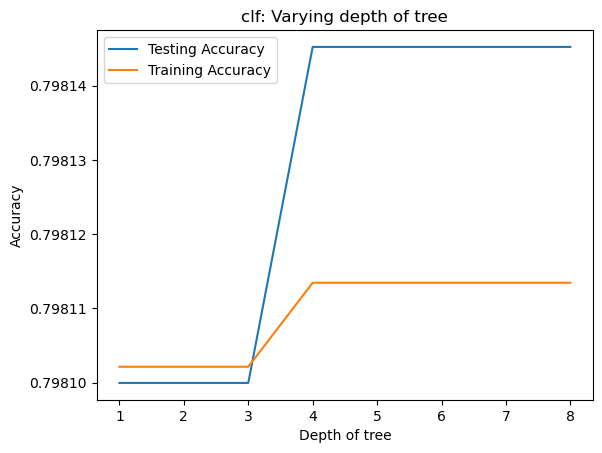

In [65]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

 - This graph indicates a decision tree depth of 4 is the ideal hyperparameter for training with this decision tree model.
 - I then ran the model using the suggested Max_depth, where testing accuracy first spikes, then testing the training and testing model for their accuracy. 

In [66]:
# Instantiate model and fit to data; clf = classifier
clf = tree.DecisionTreeClassifier(max_depth=4, class_weight='balanced')

# Train our model 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [67]:
# Make predictions and return the accuracy score using the clf.score fields

train_accuracy = clf.score(X_train,y_train)
print("Train Accuracy:")
print(train_accuracy)

test_accuracy = clf.score(X_test,y_test)
print("Test Accuracy:")
print(test_accuracy)

Train Accuracy:
0.6943765834238147
Test Accuracy:
0.690839176656865


## RandomForestClassifer

 - The Random Forest Classifier used the same random-state as the decision tree for best cross-comparison between models.
 - However, iterative, trial-and-error changes of the n_estimators, max_depth, and min_samples_leaf hyper parameters were tested to the values that produced the best accuracy score. 

In [68]:
# Train initial model
rfmodel = RandomForestClassifier(random_state=42, bootstrap=True, n_estimators=150, max_depth=5, min_samples_leaf = 30, class_weight='balanced')
rfmodel.fit(X_train, y_train)

# Predict on the test set
rfy_pred = rfmodel.predict(X_test)

# Calculate accuracy
rfaccuracy = accuracy_score(y_test, rfy_pred)
print(f"RandomForest Accuracy: {rfaccuracy:.2%}")

# Calculate R-Squared
rfr2score = r2_score(y_test, rfy_pred)
print(f"RandomForest R-Squared:", rfr2score)

# Calculate mean squared error
rfmse = mean_squared_error(y_test, rfy_pred)
print(f"RandomForest MSE:", rfmse)
print(f"No-show_binary overall Variance:",df_appts_model["No-show_binary"].var(ddof=0))


RandomForest Accuracy: 69.05%
RandomForest R-Squared: -0.9208740279540375
RandomForest MSE: 0.3095227324134811
No-show_binary overall Variance: 0.16113536559105143


 - Overall Accuracy for the Random Forest was higher than the Decision Tree model, showing a better model using the same data and columns for testing.
 - However, the overall Mean Squared Error was far higher than the overall variance of our prediction variable, indicating the model did not outperform a neive model of predicting every patient to not No-show (value of 0) for all appointments. 

In [69]:
# Get feature importances - how much predictive power did each column have in the final prediction accuracy score?
importances = pd.Series(rfmodel.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

SMS_received    0.701262
Age_65 +        0.098611
Age_55 - 64     0.081769
Age_16 - 24     0.053954
Hypertension    0.040437
Scholarship     0.023966
dtype: float64


- The list of generated feature importance for the model above was used to iteratively add or remove columns to test overall model accuracy by removing both the columns that seemed to be over-utilized and those that were under utilized.
- SMS_Received, Age_65+, Age_55 - 64, Age_16 - 24, Hypertension, and Scholarship were the list of fields that produced the highest accuracy score among all other combinations of columns tested. Any new column added or column removed would decrease overall model accuracy. 

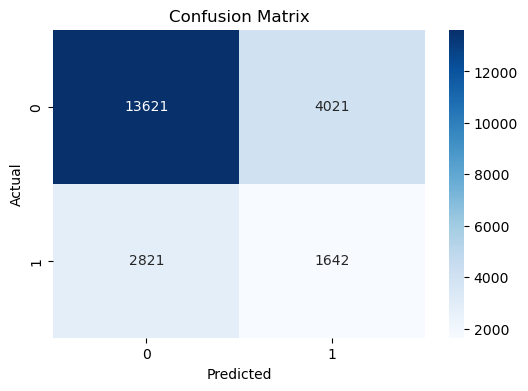

In [70]:
# Generate confusion matrix
cm = confusion_matrix(y_test, rfy_pred)

# Plotting the confusion matrix for better readability
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


 - Finally, the confusion matrix above indicates that we make more Type 1 errors (predict No-show when the patient actually shows) than Type 2 errors (predict patient arrives when the patient actually no-shows).
   - Type 1 Errors were 4021 / 22105 = 18.2%
   - Type 2 Errors were 2821 / 22105 = 12.8%
 - By predicting more patients will no-show than we expect, the results may mean that management will over-book the clinic with more patients than they can handle. The result would negative affect patients who will have a longer wait time for their appointments while also negatively affecting clinic staff and providers with increased burn out from staying in clinic for longer hours to see every patient who entered the facility.
 - This result may have a less tangible cost but may still lead to overall cost due to patient leakage and provider/staff turnover.
 - More data and advanced modeling tactics is necessary before this model may be used to predict no-show rates and drive down overall costs. 